In [1]:
import numpy as np
import torch
import torch.nn as nn

##### nn.Linear layer

In [10]:
torch.manual_seed(2023)
input = torch.randn(2, 4)
print(input.size())
print(input)

torch.Size([2, 4])
tensor([[-1.2075,  0.5493, -0.3856,  0.6910],
        [-0.7424,  0.1570,  0.0721,  1.1055]])


In [11]:
m = nn.Linear(in_features=4, out_features=3, bias=False)
print(m)

Linear(in_features=4, out_features=3, bias=False)


In [12]:
m.weight

Parameter containing:
tensor([[-0.2568,  0.4644,  0.0034, -0.4680],
        [ 0.3316, -0.1193, -0.1461, -0.2886],
        [ 0.4839,  0.1632,  0.2001, -0.4845]], requires_grad=True)

In [13]:
output = m(input)
print(output.shape)
print(output)

torch.Size([2, 3])
tensor([[ 0.2406, -0.6090, -0.9066],
        [-0.2534, -0.5945, -0.8548]], grad_fn=<MmBackward0>)


In [17]:
output_matmul = np.matmul(input, m.weight.T.detach().numpy())
print(output_matmul)

tensor([[ 0.2406, -0.6090, -0.9066],
        [-0.2534, -0.5945, -0.8548]])


In [19]:
output.detach() == output_matmul

tensor([[True, True, True],
        [True, True, True]])

##### Conv2d layer

In [20]:
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
from torchvision import datasets

In [21]:
mnist_transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize(mean=(0.5,), std=(1.0,))])

In [27]:
trainset = datasets.MNIST(root='data/', train=True, download=True, transform=mnist_transform)
testset = datasets.MNIST(root='data/', train=False, download=True, transform=mnist_transform)

In [28]:
# DataLoader는 dataset전체를 보관했다가 batch_size크기만클 data를 가져온다.
train_loader = DataLoader(trainset, batch_size=8, shuffle=True, num_workers=2)
test_loader = DataLoader(testset, batch_size=8, shuffle=False, num_workers=2)

In [29]:
# data를 loader를 이용해서 iteration으로 가져온다.
dataiter = iter(train_loader)
images, labels = next(dataiter)
print(images.size(), labels.size())

torch.Size([8, 1, 28, 28]) torch.Size([8])


In [33]:
torch.cuda.is_available()

True

In [35]:
layer = nn.Conv2d(in_channels=1, out_channels=20, kernel_size=5, stride=1).to(torch.device('cpu'))

In [36]:
weight = layer.weight.detach().numpy()
print(weight.shape)

(20, 1, 5, 5)


In [37]:
print(f"images shape : {images.shape}")
print(f"images[0] size : {images[0].size()}")

images shape : torch.Size([8, 1, 28, 28])
images[0] size : torch.Size([1, 28, 28])


In [39]:
input_image = torch.squeeze(images[7])
print(f"input image size : {input_image.size()}")

input image size : torch.Size([28, 28])


In [41]:
input_data = torch.unsqueeze(images[7], dim=0)
print(f"input_data size : {input_data.size()}")      # 1=인풋한장, 1=흑백, 28=width, 28=height

input_data size : torch.Size([1, 1, 28, 28])


In [42]:
# Conv2d layer를 통과시킬 때 어떤 식으로 weight가 적용되고 결과가 나오는지 살펴보자
output_data = layer(input_data)
output = output_data.data
print(f"output size : {output.size()}")

output size : torch.Size([1, 20, 24, 24])


In [43]:
print(output)

tensor([[[[ 0.2866,  0.2866,  0.2866,  ...,  0.2866,  0.2866,  0.2866],
          [ 0.2866,  0.2866,  0.2866,  ...,  0.2866,  0.2866,  0.2866],
          [ 0.2866,  0.2866,  0.2866,  ...,  0.2866,  0.2866,  0.2866],
          ...,
          [ 0.2866,  0.2866,  0.2866,  ...,  0.2866,  0.2866,  0.2866],
          [ 0.2866,  0.2866,  0.2866,  ...,  0.2866,  0.2866,  0.2866],
          [ 0.2866,  0.2866,  0.2866,  ...,  0.2866,  0.2866,  0.2866]],

         [[-0.3748, -0.3748, -0.3748,  ..., -0.3748, -0.3748, -0.3748],
          [-0.3748, -0.3748, -0.3748,  ..., -0.3748, -0.3748, -0.3748],
          [-0.3748, -0.3748, -0.3748,  ..., -0.3748, -0.3748, -0.3748],
          ...,
          [-0.3748, -0.3748, -0.3748,  ..., -0.3748, -0.3748, -0.3748],
          [-0.3748, -0.3748, -0.3748,  ..., -0.3748, -0.3748, -0.3748],
          [-0.3748, -0.3748, -0.3748,  ..., -0.3748, -0.3748, -0.3748]],

         [[ 0.4517,  0.4517,  0.4517,  ...,  0.4517,  0.4517,  0.4517],
          [ 0.4517,  0.4517,  

In [44]:
output_arr = output.numpy()
print(type(output_arr), output_arr.shape)

<class 'numpy.ndarray'> (1, 20, 24, 24)


In [45]:
import matplotlib.pyplot as plt

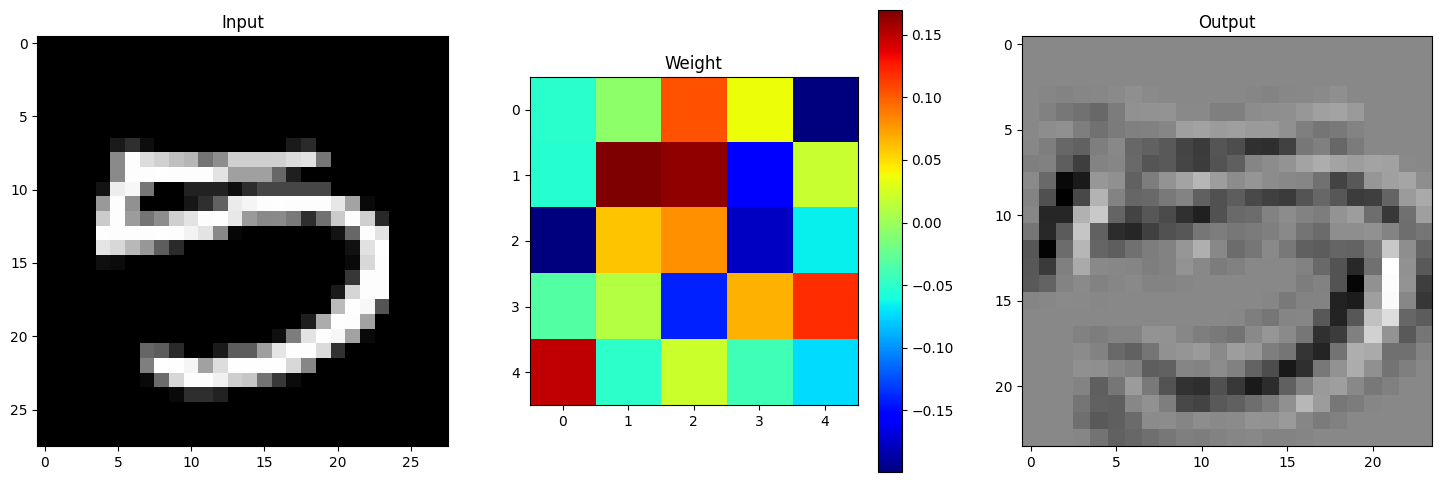

In [53]:
plt.figure(figsize=(18, 6))

plt.subplot(131); plt.title("Input")
plt.imshow(input_image, cmap='gray')

plt.subplot(132); plt.title("Weight")
plt.imshow(weight[0, 0, :, :], cmap='jet')
plt.colorbar()

plt.subplot(133); plt.title("Output")
plt.imshow(output_arr[0, 0, :, :], cmap='gray')

plt.show()